In [1]:
from maxent_disaggregation import maxent_disagg
import numpy as np

In [2]:
mean = 10
sd = 2
shares = [0.6, 0.3, np.nan, np.nan]
sds=[0.3,0.1,0.1, 0.5]
min_0 = -1
max_0 = 100

In [3]:
samples, agg, shares_, gamma = maxent_disagg(n=10000, mean_0=mean, sd_0=sd, shares=shares, sds=sds,log=True, grad_based=True, return_shares=True, return_aggregate=True, threshold_shares=0.1, min_0=min_0, max_0=max_0)
print("#######")
print(gamma)
print(shares_.mean(axis=0), shares_.std(axis=0))

Sds above threshold: [0.38570466 0.48314496 0.24685527 0.75380718], sds: [0.3 0.1 0.1 0.5], sample_sd: [0.1842886  0.1483145  0.12468553 0.12309641], indices: [0 1 2 3]
#######
1.9999999986039767
[0.57636142 0.32543645 0.0495969  0.04860524] [0.1842886  0.1483145  0.12468553 0.12309641]


/Users/ajakobs/Documents/code_projects/maxent_disaggregation/maxent_disaggregation/maxent_disaggregation.py:149: UserWarning: You provided a negative lower bound but the lognormal distribution cannot be used with negative values. Setting low_bound to 0. Alternatively set log=False.
  warnings.warn(
/Users/ajakobs/Documents/code_projects/maxent_disaggregation/maxent_disaggregation/maxent_disaggregation.py:154: UserWarning: You provided a finite high bound, currently this not supported for the lognormal distribution. High bound is ignored. Alternatively set log=False.
  warnings.warn(
/Users/ajakobs/Documents/code_projects/maxent_disaggregation/maxent_disaggregation/shares.py:138: UserWarning: You have standard deviations for shares without a best guess estimate. This is not recommended, please check your inputs. These will be treated as missing values and ignored for the calculation.
  warnings.warn(
/Users/ajakobs/Documents/code_projects/maxent_disaggregation/maxent_disaggregation/shar

In [4]:
samples[:,0].mean(), samples[:,0].std(), samples[:,1].mean(), samples[:,1].std(), samples[:,2].mean(), samples[:,2].std()

(np.float64(5.782810554226517),
 np.float64(2.2138374154746505),
 np.float64(3.266394327686924),
 np.float64(1.6591418524137502),
 np.float64(0.49748504941112676),
 np.float64(1.282500315951324))

In [5]:
sample = np.random.beta(0.5, 0.5, size=100)


In [6]:
sample.mean()

np.float64(0.5497165597728346)

In [7]:
sample.std()

np.float64(0.3465542785874612)

In [8]:
sample.sum()

np.float64(54.97165597728346)

In [9]:
from scipy.special import beta

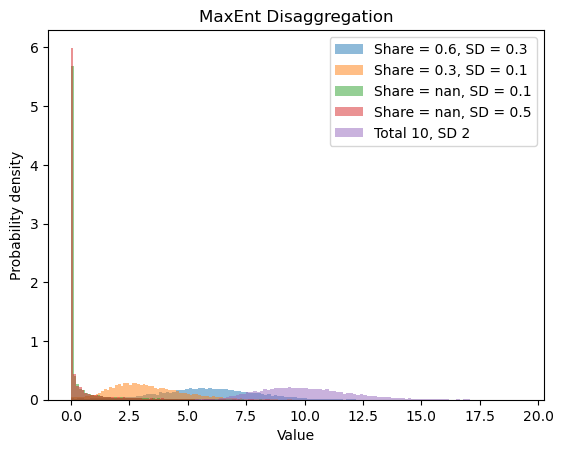

In [10]:
import matplotlib.pyplot as plt
for i in range(4):
    if sds is not None:
        std = sds[i]
    else:
        std = sds
    if shares is not None:
        share = shares[i]
    else:
        share = shares
    plt.hist(samples[:,i], bins=100, alpha=0.5, label=f'Share = {share}, SD = {std}', density=True)
plt.hist(samples.sum(axis=1), bins=100, alpha=0.5, label=f'Total {mean}, SD {sd}', density=True)
plt.legend()
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.title('MaxEnt Disaggregation')
plt.show()

In [11]:
def dir_gamma(n, shares, gamma_par, threshold=1e-2):
    alpha = gamma_par * shares
    l = len(alpha)
    rate = np.ones(l)
    rate[alpha < threshold] = 1 / alpha[alpha < threshold]
    alpha[alpha < threshold] = 1
    x = gamma.rvs(alpha, scale=1 / rate, size=(n, l))
    sample = x / x.sum(axis=1, keepdims=True)
    return sample

In [12]:
from scipy.stats import gamma

In [13]:
n=10000
shares = np.array([0.8, 0.195, 0.001, 0.004])
gamma_par = 2

In [14]:
%%time
samples = dir_gamma(n, shares, gamma_par)

CPU times: user 1.28 ms, sys: 484 μs, total: 1.76 ms
Wall time: 1.11 ms


In [15]:
%%time
samples2 = dirichlet.rvs(shares*gamma_par, size=n)

NameError: name 'dirichlet' is not defined

In [16]:
samples.mean(axis=0), samples.std(axis=0), samples2.mean(axis=0), samples2.std(axis=0)

NameError: name 'samples2' is not defined

In [ ]:
samples.mean(axis=0)/samples2.mean(axis=0), samples.std(axis=0)/samples2.std(axis=0)

(array([0.99484618, 0.9978986 , 1.85344794, 1.89374126]),
 array([0.99617243, 1.00464685, 0.37923018, 0.43048042]))

In [ ]:
samples.mean(axis=0)/shares, samples2.mean(axis=0)/shares

(array([0.99603912, 0.99236061, 1.9796772 , 1.91967782]),
 array([1.00119912, 0.99445035, 1.0681051 , 1.01369594]))